# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import json
import citipy

from scipy.stats import linregress
from citipy import citipy

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

#Output data as CSV to appropriate file
output_csv = "output_data/cities.csv"

#create a range for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
#first make lists to hold latitudes and longitudes. Also make a list to hold cities.
lats_lngs = []
cities = []

#generate a random series of latitude and longitude coordinates. Use numpy random function.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#use the zip function to combine and place into the empty lats_lngs list
lats_lngs = zip(lats, lngs)

#use citipy to find the city closest to the random lat/lng combos.
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #For each unique city, add it to the empty cities list
    if city not in cities:
        cities.append(city)

#print the cities to confirm sample size is adequate
print(cities)
len(cities)


['iqaluit', 'san carlos de bariloche', 'rikitea', 'albany', 'avarua', 'hamilton', 'daxian', 'isangel', 'tashla', 'taolanaro', 'samarai', 'ishigaki', 'miraflores', 'aklavik', 'carnarvon', 'ponta do sol', 'mehamn', 'ribeira grande', 'bluff', 'rani', 'utiroa', 'mount gambier', 'mataura', 'busselton', 'hermanus', 'khash', 'tuktoyaktuk', 'rocha', 'saint-augustin', 'ushuaia', 'lorengau', 'georgetown', 'ilulissat', 'yellowknife', 'houma', 'meyungs', 'torbay', 'punta arenas', 'mahebourg', 'barbar', 'puerto ayora', 'walvis bay', 'salisbury', 'auki', 'dzilam gonzalez', 'codrington', 'broken hill', 'smithers', 'flinders', 'nampula', 'jamestown', 'tsihombe', 'fairbanks', 'port alfred', 'dikson', 'shimoda', 'butaritari', 'leningradskiy', 'camacha', 'tasiilaq', 'lebu', 'saint-philippe', 'airai', 'sterling', 'hithadhoo', 'serrinha', 'ternate', 'atuona', 'hilo', 'pisco', 'tessalit', 'carbonia', 'nizhneyansk', 'geraldton', 'sistranda', 'west bay', 'barrow', 'saint george', 'ancud', 'vaini', 'stephenvil

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#first create the necessary lists and counters to perform all the requested operations
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
windspeed_list = []
index_counter = 0
set_counter = 1

#perform API Calls
##point to the url needed for the data and set the units for the output to imperial
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#set the url for the query
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#construct a for loop that matches city names with the city_list.
##Enumerate is the key here. Documentation: https://docs.python.org/3/library/functions.html?highlight=enumerate#enumerate
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        #now insert all the names of the lists we made and append to them
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response["main"]["temp_max"])
        windspeed_list.append(response["wind"]["speed"])
        
        #use if and else statements pointing to the counters to loop through
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        
        #return the results with an f string
        print(f"Processing Data {index_counter} of Set {set_counter}:{city}")
        
    #handle the errors with an exception
    except(KeyError, IndexError):
        print("City not located. Moving on.")
print("I'm Finished.")

Processing Data 1 of Set 1:iqaluit
Processing Data 2 of Set 1:san carlos de bariloche
Processing Data 3 of Set 1:rikitea
Processing Data 4 of Set 1:albany
Processing Data 5 of Set 1:avarua
Processing Data 6 of Set 1:hamilton
City not located. Moving on.
Processing Data 7 of Set 1:isangel
Processing Data 8 of Set 1:tashla
City not located. Moving on.
Processing Data 9 of Set 1:samarai
Processing Data 10 of Set 1:ishigaki
Processing Data 11 of Set 1:miraflores
Processing Data 12 of Set 1:aklavik
Processing Data 13 of Set 1:carnarvon
Processing Data 14 of Set 1:ponta do sol
Processing Data 15 of Set 1:mehamn
Processing Data 16 of Set 1:ribeira grande
Processing Data 17 of Set 1:bluff
Processing Data 18 of Set 1:rani
City not located. Moving on.
Processing Data 19 of Set 1:mount gambier
Processing Data 20 of Set 1:mataura
Processing Data 21 of Set 1:busselton
Processing Data 22 of Set 1:hermanus
Processing Data 23 of Set 1:khash
Processing Data 24 of Set 1:tuktoyaktuk
Processing Data 25 of

Processing Data 5 of Set 5:nuuk
Processing Data 6 of Set 5:shimanovsk
Processing Data 7 of Set 5:baiyin
Processing Data 8 of Set 5:new norfolk
Processing Data 9 of Set 5:salvador
Processing Data 10 of Set 5:havre-saint-pierre
Processing Data 11 of Set 5:jodhpur
Processing Data 12 of Set 5:yola
Processing Data 13 of Set 5:seoul
Processing Data 14 of Set 5:horw
Processing Data 15 of Set 5:lodja
Processing Data 16 of Set 5:bandarbeyla
Processing Data 17 of Set 5:merauke
Processing Data 18 of Set 5:zalantun
Processing Data 19 of Set 5:khunti
Processing Data 20 of Set 5:bull savanna
Processing Data 21 of Set 5:ludvika
Processing Data 22 of Set 5:bethel
Processing Data 23 of Set 5:hobart
Processing Data 24 of Set 5:dunedin
Processing Data 25 of Set 5:birao
City not located. Moving on.
Processing Data 26 of Set 5:abu kamal
Processing Data 27 of Set 5:zhanaozen
Processing Data 28 of Set 5:severo-kurilsk
Processing Data 29 of Set 5:laguna
Processing Data 30 of Set 5:kamenka
Processing Data 31 o

Processing Data 6 of Set 9:monrovia
Processing Data 7 of Set 9:saldanha
Processing Data 8 of Set 9:iranshahr
Processing Data 9 of Set 9:lebedinyy
Processing Data 10 of Set 9:yulara
Processing Data 11 of Set 9:anloga
Processing Data 12 of Set 9:gazalkent
Processing Data 13 of Set 9:awbari
Processing Data 14 of Set 9:petropavlovsk-kamchatskiy
Processing Data 15 of Set 9:buchanan
Processing Data 16 of Set 9:kot diji
City not located. Moving on.
Processing Data 17 of Set 9:humaita
Processing Data 18 of Set 9:ostrovnoy
Processing Data 19 of Set 9:pacific grove
Processing Data 20 of Set 9:bintulu
Processing Data 21 of Set 9:beringovskiy
Processing Data 22 of Set 9:basay
City not located. Moving on.
Processing Data 23 of Set 9:shingu
Processing Data 24 of Set 9:neuquen
Processing Data 25 of Set 9:tautira
Processing Data 26 of Set 9:nebug
Processing Data 27 of Set 9:palauig
Processing Data 28 of Set 9:lubbock
Processing Data 29 of Set 9:anadyr
Processing Data 30 of Set 9:kavaratti
Processing D

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#editing code for another push. had an error.
##create the dataframe with pd.DataFrame
weather_df = pd.DataFrame({
    "City" : city_list,
    "Country" : country_list,
    "Latitude" : lats_list,
    "Longitude" : lngs_list,
    "Maximum Temperature" : temp_max_list,
    "Humidity" : humidity_list,
    "Wind Speed" : windspeed_list,
    "Date" : date_list
})

#display the dataframe
weather_df.head()

###lists for easy copying and inclusion
#city_list = []
#cloudiness_list = []
#country_list = []
#date_list = []
#humidity_list = []
#lats_list = []
#lngs_list = []
#temp_max_list = []
#windspeed_list = []

,City,Country,Latitude,Longitude,Maximum Temperature,Humidity,Wind Speed,Date
0,Iqaluit,CA,63.7506,-68.5145,35.33,74,5.99,1622479267
1,Bariloche,AR,-41.1456,-71.3082,51.55,93,9.71,1622478627
2,Rikitea,PF,-23.1203,-134.9692,74.17,66,13.40,1622479267
3,Albany,US,42.6001,-73.9662,56.91,81,6.53,1622479232
4,Avarua,CK,-21.2078,-159.7750,64.45,88,2.30,1622479268


In [9]:
#count the data to make sure it's enough for the exercise
weather_df.count()

City                   586
Country                586
Latitude               586
Longitude              586
Maximum Temperature    586
Humidity               586
Wind Speed             586
Date                   586
dtype: int64

In [17]:
#output the data results to the appropriate csv file for the hw
##documentation for .to_csv here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
weather_df.to_csv('output_csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,18.461282,21.044162,67.795461,67.276451,8.048549,1.622479e+09
std,33.213103,91.024577,16.583098,21.953456,5.575924,1.485486e+02
min,-54.800000,-175.200000,26.830000,1.000000,0.000000,1.622479e+09
25%,-9.766450,-61.886475,56.695000,53.000000,3.765000,1.622479e+09
50%,21.388350,27.139300,70.135000,74.000000,6.835000,1.622479e+09
75%,46.521375,103.759175,80.332500,84.000000,11.425000,1.622479e+09
max,78.218600,179.316700,108.460000,100.000000,28.480000,1.622479e+09


In [19]:
#  Get the indices of cities that have humidity over 100%.
print('The Maximum Humidity observed in the DataFrame is 100%. No cities have humidity values greater than 100%. Skipping next step as instructed.')

The Maximum Humidity observed in the DataFrame is 100%. No cities have humidity values greater than 100%. Skipping next step as instructed.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/Lat_v_MaxT.png'

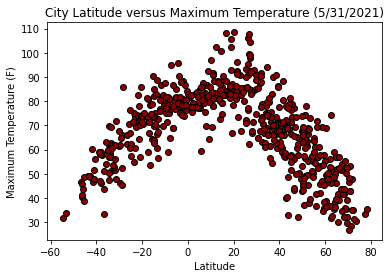

In [20]:
#figure out one, and that's the template for all.
##use plt.scatter . Then label title, xlabel, ylabel. Gonna use the grid. Use .savefig for .png files.
###documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
####color documenation: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.scatter(weather_df['Latitude'], weather_df['Maximum Temperature'], color="darkred", edgecolor="black")

plt.title("City Latitude versus Maximum Temperature (5/31/2021)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("../Images/Lat_v_MaxT.png")

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression